In [1]:
import numpy as np
from numpy import matlib as ml
import pandas as pd
import os
import warnings
import librosa
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
from random import shuffle
import scipy.stats as st

from pynwb import NWBHDF5IO

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as grid_spec

# import pydtmc

import pdb
# warnings.filterwarnings('ignore')

In [2]:
# ----- LOAD DATA -----
data = pd.read_csv('all_annotations.csv')

# ----- FIGURES -----
outp = os.path.join('figures','2024November')

In [3]:
# ----- SET UP COLORS -----
acols = [[0.627451,   0.57254905, 0.37254903],
        [0.9607843,  0.7882353,  0.15294118],
        [0.34901962, 0.35686275, 0.49019608],
        [0.24705882, 0.30588236, 0.9607843 ]]

fcols = acols[0:2]
mcols = acols[2:]

fpal = sns.color_palette(fcols)
mpal = sns.color_palette(mcols)
apal = sns.color_palette(acols)

# set hue order
ho = ['WT','Het']

Text(0.5, 1.0, 'Huddle duration, males')

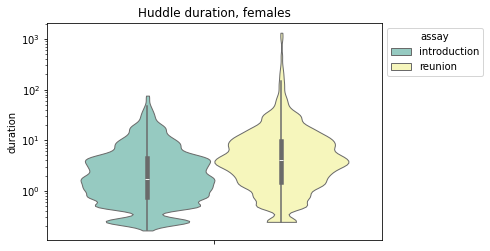

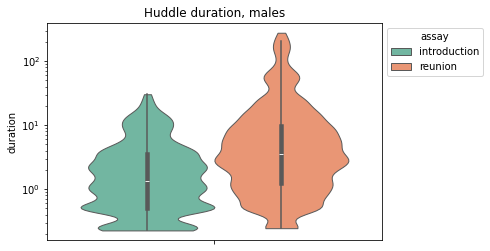

In [4]:
# ----- COMPARE HUDDLE LENGTH POPULATIONS FROM INTRO AND REUNION -----

sexes = ['F','M']
GT = 'WT'
assays=['introduction','reunion']
behavior = 'Huddle'
usestat = 'duration'

allfilt = data.loc[(data['sex'].isin(sexes)) & (data['assay'].isin(assays)) & (data['behavior']==behavior) & (data['GT']==GT)]
#allfilt.duration[allfilt.duration==0] += 0.001
allfilt = allfilt[allfilt.duration>0.1]

# females
f = plt.figure()
ax = sns.violinplot(data=allfilt[allfilt.sex=='F'], y=usestat, bw_adjust=0.5, cut=0, linewidth=1, palette='Set3',hue='assay',
              log_scale = (None,10),density_norm='count')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.set_title('Huddle duration, females')

g = plt.figure()
ax = sns.violinplot(data=allfilt[allfilt.sex=='M'], y='duration', bw_adjust=0.5, cut=0, linewidth=1, palette='Set2',hue='assay',
              log_scale = (None,10),density_norm='count')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.set_title('Huddle duration, males')

Text(0.5, 1.0, 'Median huddle duration, males')

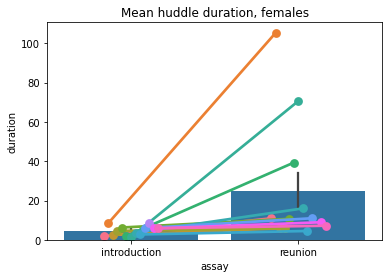

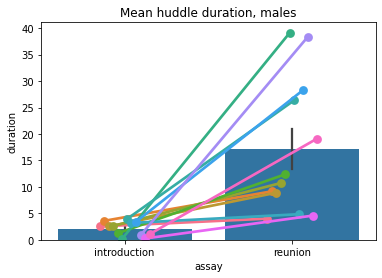

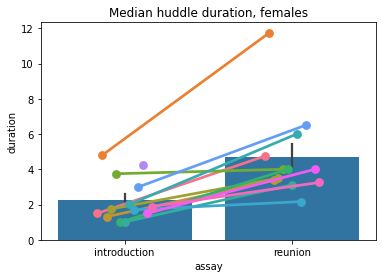

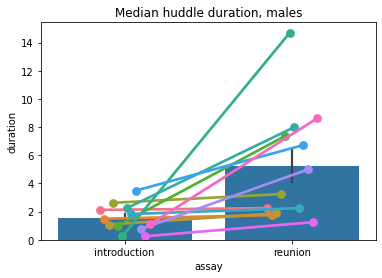

In [5]:
# ----- CALCULATE MEAN DURATION PER INDIVIDUAL -----

allmeans = allfilt.groupby(['pair_tag','sex','assay'])[['duration']].mean().reset_index()
allmeds = allfilt.groupby(['pair_tag','sex','assay'])[['duration']].median().reset_index()

# plot female means
f = plt.figure()
ax = sns.barplot(data=allmeans[allmeans.sex=='F'], x="assay", y="duration", errorbar="se")
sns.pointplot(data=allmeans[allmeans.sex=='F'], x="assay", y="duration", hue="pair_tag", dodge=True,ax=ax)
ax.get_legend().remove()
ax.set_title('Mean huddle duration, females')

# plot male means
g = plt.figure()
ax = sns.barplot(data=allmeans[allmeans.sex=='M'], x="assay", y="duration", errorbar="se")
sns.pointplot(data=allmeans[allmeans.sex=='M'], x="assay", y="duration", hue="pair_tag", dodge=True,ax=ax)
ax.get_legend().remove()
ax.set_title('Mean huddle duration, males')

# plot female medians
h = plt.figure()
ax = sns.barplot(data=allmeds[allmeds.sex=='F'], x="assay", y="duration", errorbar="se")
sns.pointplot(data=allmeds[allmeds.sex=='F'], x="assay", y="duration", hue="pair_tag", dodge=True,ax=ax)
ax.get_legend().remove()
ax.set_title('Median huddle duration, females')

# plot male means
i = plt.figure()
ax = sns.barplot(data=allmeds[allmeds.sex=='M'], x="assay", y="duration", errorbar="se")
sns.pointplot(data=allmeds[allmeds.sex=='M'], x="assay", y="duration", hue="pair_tag", dodge=True,ax=ax)
ax.get_legend().remove()
ax.set_title('Median huddle duration, males')

<AxesSubplot: xlabel='duration', ylabel='Count'>

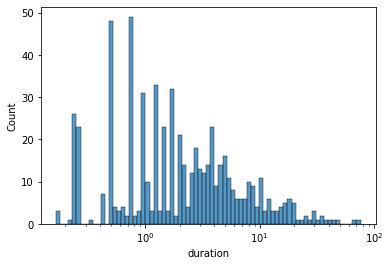

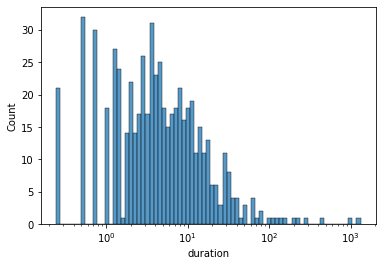

In [6]:
# ----- PLOT DURATION DISTRIBUTIONS IN BAR HISTOGRAMS ------

# female intro
a = plt.figure()
fint = allfilt.loc[(allfilt['sex']=='F') & (allfilt['assay']=='introduction')]
sns.histplot(data=fint,x='duration',bins=75,log_scale=(10,False))

# female reunion
b = plt.figure()
freu = allfilt.loc[(allfilt['sex']=='F') & (allfilt['assay']=='reunion')]
sns.histplot(data=freu,x='duration',bins=75,log_scale=(10,False))

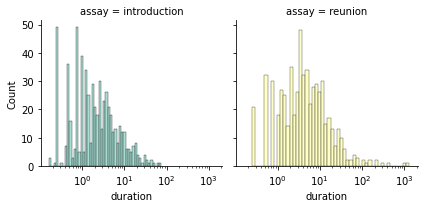

In [7]:
x = sns.FacetGrid(allfilt[allfilt.sex=='F'],col='assay',hue='assay',palette='Set3')
x.map_dataframe(sns.histplot,x='duration',bins=50,log_scale=(10,False))

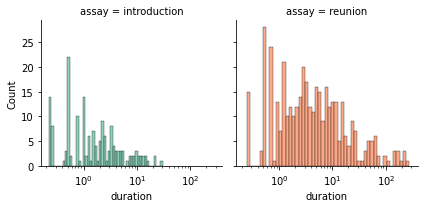

In [8]:
y = sns.FacetGrid(allfilt[allfilt.sex=='M'],col='assay',hue='assay',palette='Set2')
y.map_dataframe(sns.histplot,x='duration',bins=50,log_scale=(10,False))

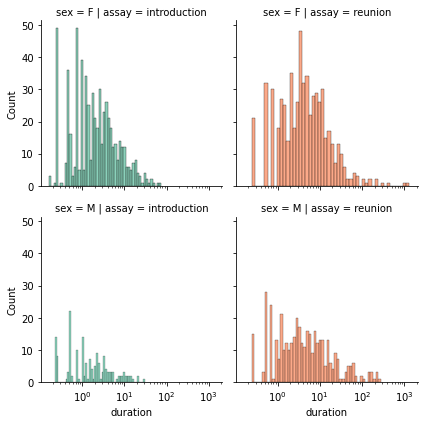

In [9]:
z = sns.FacetGrid(allfilt,col='assay',row='sex',hue='assay',palette='Set2')
z.map_dataframe(sns.histplot,x='duration',bins=50,log_scale=(10,False))

Text(0.5, 1.0, 'Huddle counts, males')

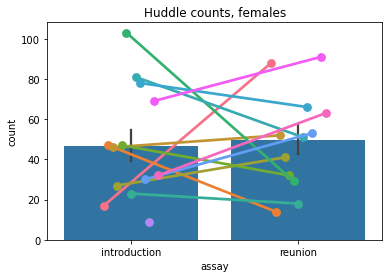

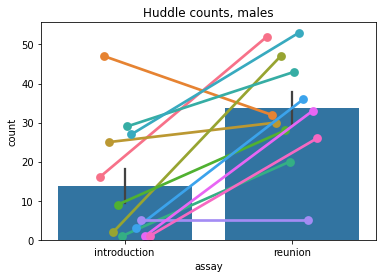

In [10]:
# ----- CALCULATE NUMBERS -----
allcounts = allfilt.groupby(['pair_tag','sex','assay'])[['duration']].count().reset_index()
allcounts = allcounts.rename(columns={'duration': 'count'})

# plot female counts
f = plt.figure()
ax = sns.barplot(data=allcounts[allcounts.sex=='F'], x="assay", y="count", errorbar="se")
sns.pointplot(data=allcounts[allcounts.sex=='F'], x="assay", y="count", hue="pair_tag", dodge=True,ax=ax)
ax.get_legend().remove()
ax.set_title('Huddle counts, females')

# plot male counts
f = plt.figure()
ax = sns.barplot(data=allcounts[allcounts.sex=='M'], x="assay", y="count", errorbar="se")
sns.pointplot(data=allcounts[allcounts.sex=='M'], x="assay", y="count", hue="pair_tag", dodge=True,ax=ax)
ax.get_legend().remove()
ax.set_title('Huddle counts, males')

Text(0.5, 1.0, 'Huddle max duration, males')

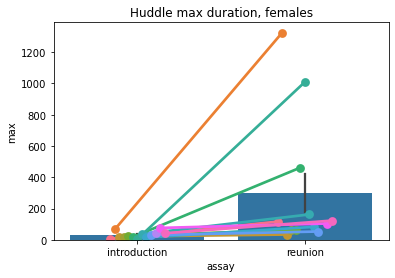

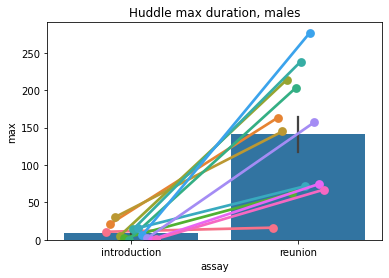

In [13]:
# ----- CALCULATE AND PLOT MAX HUDDLE LENGTH PER INDIVIDUAL -----

allmaxes = allfilt.groupby(['pair_tag','sex','assay'])[['duration']].max().reset_index()
allmaxes = allmaxes.rename(columns={'duration': 'max'})

# plot female counts
f = plt.figure()
ax = sns.barplot(data=allmaxes[allmaxes.sex=='F'], x="assay", y="max", errorbar="se")
sns.pointplot(data=allmaxes[allmaxes.sex=='F'], x="assay", y="max", hue="pair_tag", dodge=True,ax=ax)
ax.get_legend().remove()
ax.set_title('Huddle max duration, females')

# plot male counts
f = plt.figure()
ax = sns.barplot(data=allmaxes[allmaxes.sex=='M'], x="assay", y="max", errorbar="se")
sns.pointplot(data=allmaxes[allmaxes.sex=='M'], x="assay", y="max", hue="pair_tag", dodge=True,ax=ax)
ax.get_legend().remove()
ax.set_title('Huddle max duration, males')

Text(0.5, 1.0, 'Total huddle time, males')

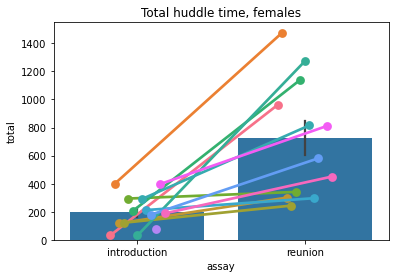

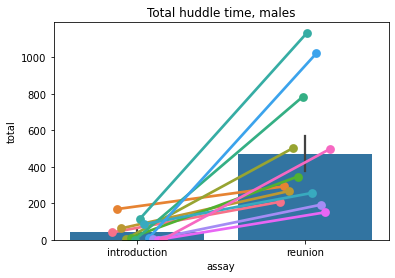

In [16]:
# ----- CALCULATE AND PLOT TOTAL HUDDLE TIME PER INDIVIDUAL -----

alltotals = allfilt.groupby(['pair_tag','sex','assay'])[['duration']].sum().reset_index()
alltotals = alltotals.rename(columns={'duration': 'total'})

# plot female counts
f = plt.figure()
ax = sns.barplot(data=alltotals[alltotals.sex=='F'], x="assay", y="total", errorbar="se")
sns.pointplot(data=alltotals[alltotals.sex=='F'], x="assay", y="total", hue="pair_tag", dodge=True,ax=ax)
ax.get_legend().remove()
ax.set_title('Total huddle time, females')

# plot male counts
f = plt.figure()
ax = sns.barplot(data=alltotals[alltotals.sex=='M'], x="assay", y="total", errorbar="se")
sns.pointplot(data=alltotals[alltotals.sex=='M'], x="assay", y="total", hue="pair_tag", dodge=True,ax=ax)
ax.get_legend().remove()
ax.set_title('Total huddle time, males')

C:\Users\nhogl\AppData\Local\Temp\ipykernel_27860\1938869720.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testdf.sort_values('duration', inplace=True)
C:\Users\nhogl\AppData\Local\Temp\ipykernel_27860\1938869720.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testdf.color = 'r'
C:\Users\nhogl\AppData\Local\Temp\ipykernel_27860\1938869720.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-

Text(0, 0.5, 'huddle duration (s)')

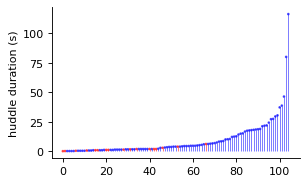

In [43]:
# ----- PROTOTYPE RANK PLOTS -----

testdf = allfilt[allfilt.pair_tag=='Pair16']
testdf.sort_values('duration', inplace=True)
testdf.reset_index(inplace=True)
testdf.color = 'r'
testdf.color[testdf.assay=='reunion']='b'

fig, ax = plt.subplots(figsize=(4,2.5), dpi= 80,frameon=False)
ax.vlines(x=testdf.index, ymin=0, ymax=testdf.duration, color=testdf.color, alpha=0.6, linewidth=0.75)
ax.scatter(x=testdf.index, y=testdf.duration, s=2, color=testdf.color, alpha=0.6)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_ylabel('huddle duration (s)')

C:\Users\nhogl\AppData\Local\Temp\ipykernel_27860\2918780610.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testdf.color[testdf.assay=='reunion']='b'
C:\Users\nhogl\AppData\Local\Temp\ipykernel_27860\2918780610.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testdf.color[testdf.assay=='reunion']='b'
C:\Users\nhogl\AppData\Local\Temp\ipykernel_27860\2918780610.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testdf.color[

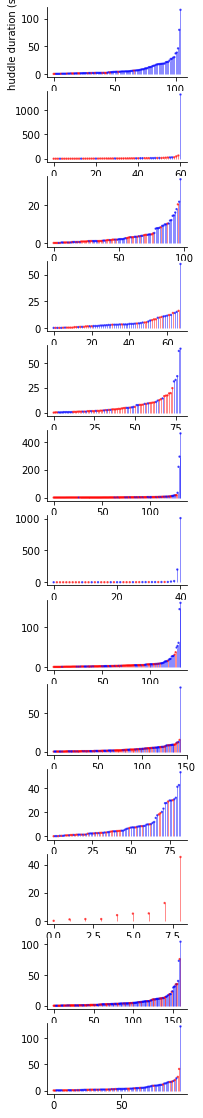

In [59]:
# ----- PUT ORDERED HUDDLE DURATION PLOTS INTO SUBPLOTS PER PAIR, FEMALES -----

fdat = allfilt[allfilt.sex=='F']
nfpairs = len(np.unique(fdat.pair_tag))

fig, axs = plt.subplots(figsize=(2.5,20),nrows=nfpairs,ncols=1)

for i,ptag in enumerate(np.unique(fdat.pair_tag)):
    thisdat = fdat[fdat.pair_tag==ptag]
    
    testdf = thisdat[thisdat.pair_tag==ptag]
    testdf.sort_values('duration', inplace=True)
    testdf.reset_index(inplace=True)
    testdf.color = 'r'
    testdf.color[testdf.assay=='reunion']='b'
    
    ax = axs[i]
    ax.vlines(x=testdf.index, ymin=0, ymax=testdf.duration, color=testdf.color, alpha=0.6, linewidth=0.75)
    ax.scatter(x=testdf.index, y=testdf.duration, s=2, color=testdf.color, alpha=0.6)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    if i==0:
        ax.set_ylabel('huddle duration (s)')

C:\Users\nhogl\AppData\Local\Temp\ipykernel_27860\1044597016.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testdf.color[testdf.assay=='reunion']='b'
C:\Users\nhogl\AppData\Local\Temp\ipykernel_27860\1044597016.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testdf.color[testdf.assay=='reunion']='b'
C:\Users\nhogl\AppData\Local\Temp\ipykernel_27860\1044597016.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testdf.color[

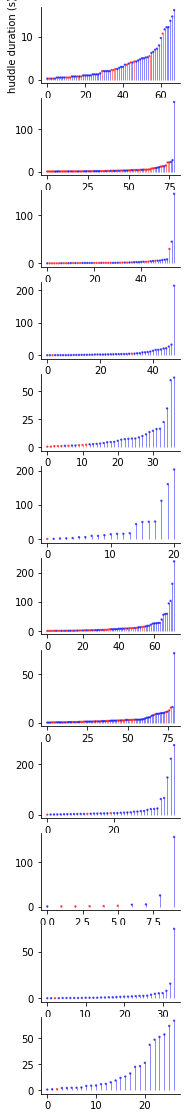

In [60]:
# ----- PUT ORDERED HUDDLE DURATION PLOTS INTO SUBPLOTS PER PAIR, MALES -----

fdat = allfilt[allfilt.sex=='M']
nfpairs = len(np.unique(fdat.pair_tag))

fig, axs = plt.subplots(figsize=(2.5,20),nrows=nfpairs,ncols=1)

for i,ptag in enumerate(np.unique(fdat.pair_tag)):
    thisdat = fdat[fdat.pair_tag==ptag]
    
    testdf = thisdat[thisdat.pair_tag==ptag]
    testdf.sort_values('duration', inplace=True)
    testdf.reset_index(inplace=True)
    testdf.color = 'r'
    testdf.color[testdf.assay=='reunion']='b'
    
    ax = axs[i]
    ax.vlines(x=testdf.index, ymin=0, ymax=testdf.duration, color=testdf.color, alpha=0.6, linewidth=0.75)
    ax.scatter(x=testdf.index, y=testdf.duration, s=2, color=testdf.color, alpha=0.6)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    if i==0:
        ax.set_ylabel('huddle duration (s)')